# Introduction to Python for Data Science - Session 3

# City Data Science Society 2019

Before you start, make sure that you have uploaded the .csv files from the project folder to the left hand side of the notebook.

The idea of this session is that you will be learning linear regression techniques on the data.csv dataset, and applying these skills on the olympics.csv datatset.

## Section A - Pandas Recap

In [1]:
import pandas as pd

dataDF = pd.read_csv("data.csv")
dataDF.head()

,X,Y
0,108,392
1,19,46
2,13,15
3,124,422
4,40,119


### 1. Columns

Select the 'Y' column from the DataFrame and print it.

### 2. Rows 

Select the 9th row of the database and print it.

## Section B - Matplotlib

#### Accessing Columns

When we access columns using Pandas we have a number of different options. 

Below I have demonstrated three options for accessing columns in a DataFrame, and I'm using the .head() method to print just the first 5 rows of each to keep the output easy to read.

In [31]:

# This will return a pandas Series - essentially a list which also includes the index of the item in the DataFrame.
print(dataDF['X'].head())

print()

# This will return a new DataFrame containing just the index and the selected column.
print(dataDF[['X']].head())

print()

# This will return a pandas Series (a shorthand way of writing dataDF['X'])
print(dataDF.X.head())

0    108
1     19
2     13
3    124
4     40
Name: X, dtype: int64

     X
0  108
1   19
2   13
3  124
4   40

0    108
1     19
2     13
3    124
4     40
Name: X, dtype: int64


Since accessing columns is easiest by using dataDF.X, you will see me use this method in the examples.

### 1. Scatter graphs

Matplotlib is a library within Python that can be used to plot our data in many different forms. 

Since we know how to select rows from our DataFrames, we can simply parse these into matplotlib and print a graph.

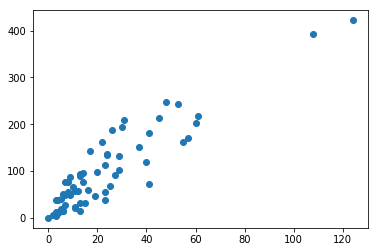

In [66]:
import matplotlib.pyplot as plt

plt.scatter(dataDF.X, dataDF.Y)

plt.show()

#### Task

1. Import the olympics.csv dataset into a DataFrame called olympicsDF.

2. Plot the DataFrame as a scatter graph using matplotlib. Use 'WinterTotal' as the X-Axis and 'SummerTotal' as the Y-Axis.

### 2. Labelling 

We can add labels to our graph and our graph's axes using the below methods.

##### X axis label
plt.xlabel("x axis label")

##### Y axis label
plt.ylabel("y axis label")

##### Graph title
plt.title("graph title")

##### Show the graph
plt.show()

#### Task

Try adding labels to the olympics graph. You will need to call plt.scatter() again and then add your labels.

### 3. Colours

If we want to plot two sets of data on the same graph, it can be useful to use different colours in order to differentiate the datasets.

In matplotlib all we need to do is add a 'color' argument when plotting the graph to change the colour of the data.

EG: plt.scatter(x, y, color='y')

Take a look at the Matplotlib documentation at the following web page.

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

#### Task

Plot the data from the 'data.csv' dataset and the 'olympics.csv' dataset on the same graph, using different colours for each.

##### Hint: You can simply write plt.scatter() on consecutive lines to plot two datasets on the same graph.

## Section C - Regression

Regression is modelling the relationship between X and Y values.

Today we will be looking at linear regression, being able to plot the relationship between two variables using linear algebra.

In [9]:
from sklearn.linear_model import LinearRegression

We can create an empty model for use within this project by simply calling the LinearRegression() method from sklearn.

In [14]:
linearModel = LinearRegression()

### 1. Data Formatting 

We have looked at how to retrieve columns easily, but in order to use these columns in our model we need to format them.

When we retrieve a column using dataDF.X, we will receive a pandas Series. We need to be able to change the shape of the column so that it can be processed properly.

### ~

### Why we need to reshape

##### The following is an explanation of why we need to reshape our X inputs for our models. 

##### Feel free to skip this section if it is of no interest.

When looking at matrix multiplication, we know that in order to multiply matrixes together we do rows multiplied by columns.

In [52]:
# [1]   [3 2 1]   [3 2 1]
# [2] *         = [6 4 2]
# [3]             [9 6 3]

Therefore in order for matrix multiplication to work, we need the first matrix to be of opposite shape to the second matrix.

Looking at the first matrix on the left, we can see that it is not formatted like a normal list.

Instead of being [1, 2, 3], it is formatted [[1], [2], [3]].

So when we parse X values into our model, we need to ensure that they are in this format so that matrix multiplication can be performed correctly.

### ~

How do we do this?

Below we are converting our pandas Series to an array by using .values, and then changing the shape of the array using .reshape(-1,1).

This turns a Series into a list containing lists.

In [53]:
x_train = dataDF.X.values

x_train = x_train.reshape(-1,1)

In [57]:
print("Before formatting: \n\n", dataDF.X.head())

print("\n\nAfter formatting: \n\n", x_train[:5])

Before formatting: 

 0    108
1     19
2     13
3    124
4     40
Name: X, dtype: int64


After formatting: 

 [[108]
 [ 19]
 [ 13]
 [124]
 [ 40]]


#### Task

1. Using the olympics.csv dataset, format the WinterTotal column as described above so that it is ready to be used in our regression algorithm.

2. Create a new instance of a LinearRegression() model. Call it something memorable like olympicsModel.

### 2. Training our model

There are two main functions we will use our model for: training and predicting.

##### .fit()

This method will train the model according to our data.

##### .predict()

This method will return a prediction of a y value when given an x value.

Here we are parsing in both the X values and the corresponding Y values. This tells the model which characteristics of X will affect Y.

In [58]:
linearModel.fit(x_train, dataDF.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that we have trained our model, we can use it as much as we like to predict values. We can also save it and use it on other projects.

#### Task

Parse in your formatted X values and Y values for the olympics DataFrame into your linear regression model using the .fit() method.

### 3. Predicting values using our model

Since we are creating a linear line through our data points, we can predict values for just two points - the maximum and the minimum of our dataset.

Below we are creating a list of the two points we would like predicted values for.

In [ ]:
x_pred = [min(dataDF.X.values), max(dataDF.X.values)]

Numpy is used to convert our newly created list into a numpy array so that we can perform reshape operations on it.

This is exactly the same procedure as describes in section C.1.

In [71]:
import numpy as np

x_pred = np.array(x_pred).reshape(-1,1)

Now that we have a set of X values, we can parse this data into our model using .predict() and get a list of predicted Y values. 

In [ ]:
y_pred = linearModel.predict(x_pred)

In [62]:
print("X values: \n", x_pred)

print("\nPredicted Y values: \n", y_pred)

X values: 
 [[  0]
 [124]]

Predicted Y values: 
 [ 19.49288308 442.87583345]


#### Task

Using the method described above, predict Y values for your olympics DataFrame.

### 4. Plotting 

We can now plot our data, just like in section B.

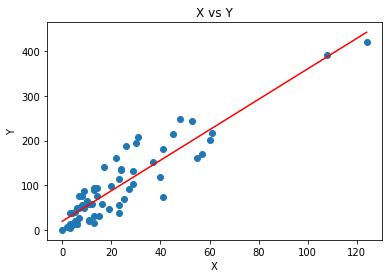

In [64]:
plt.scatter(dataDF.X, dataDF.Y)

# plt.plot() will plot a line rather than a scatter graph.
plt.plot(x_pred, y_pred, color='r')

plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs Y")

plt.show()

#### Task

Plot a graph of the olympics dataset and the x_pred and y_pred values generated.